In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data.csv")
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

<Axes: xlabel='No-show', ylabel='count'>

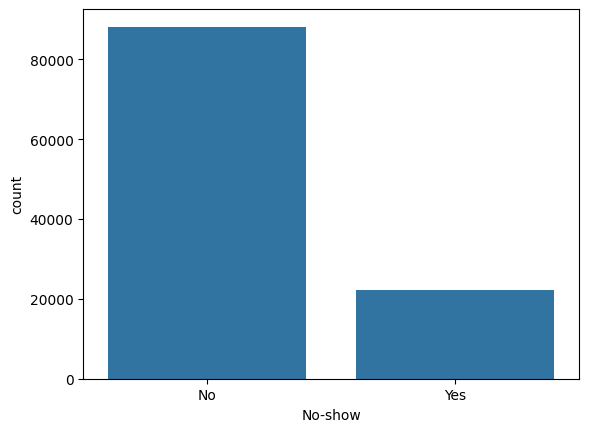

In [7]:
sns.barplot(data=df["No-show"].value_counts())

In [8]:
df["No-show"] = df["No-show"].map({"No": 0, "Yes": 1})

In [9]:
df = df[(df["Age"] > 0) & (df["Age"] < 100)].reset_index(drop=True)

<Axes: title={'center': 'No-show rate by age'}, xlabel='Age', ylabel='No-show'>

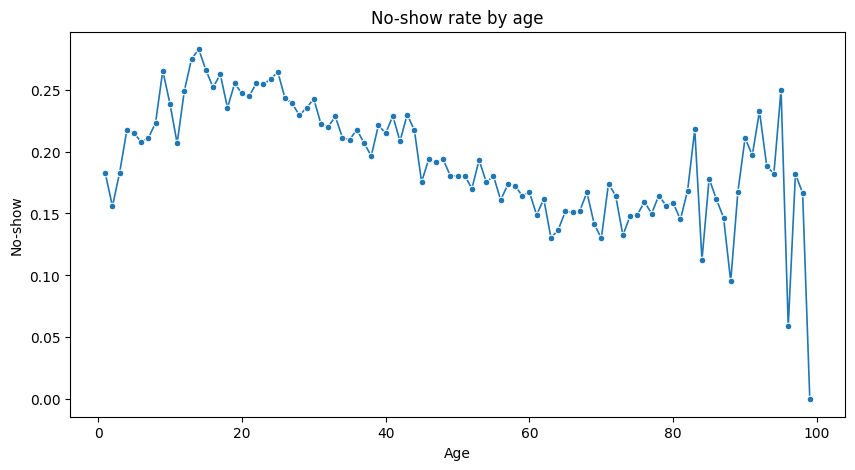

In [10]:
no_show_age = df.groupby("Age")["No-show"].mean()
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.set_title("No-show rate by age")
sns.set_context("paper", font_scale=2)
sns.lineplot(data=no_show_age, marker="o", ax=ax)

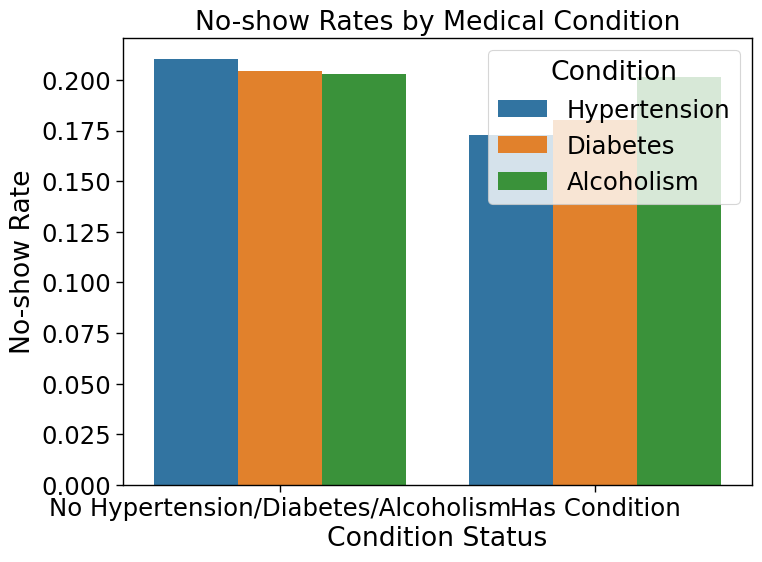

In [11]:
import seaborn as sns
rates = {
    'Hypertension': df.groupby("Hipertension")['No-show'].mean(),
    'Diabetes': df.groupby("Diabetes")['No-show'].mean(),
    'Alcoholism': df.groupby("Alcoholism")['No-show'].mean()
}
rate_df = pd.DataFrame(rates).T
rate_df.columns = ['No Hypertension/Diabetes/Alcoholism', 'Has Condition']
melted_df = rate_df.reset_index().melt(id_vars='index', var_name='Condition Status', value_name='No-show Rate')
melted_df.rename(columns={'index': 'Condition'}, inplace=True)
plt.figure(figsize=(8, 6))
sns.barplot(data=melted_df, x='Condition Status', y='No-show Rate', hue='Condition')
plt.title('No-show Rates by Medical Condition')
plt.ylabel('No-show Rate')
plt.xlabel('Condition Status')
plt.legend(title='Condition')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'No-show rate by Handicap'}, xlabel='Handcap', ylabel='No-show'>

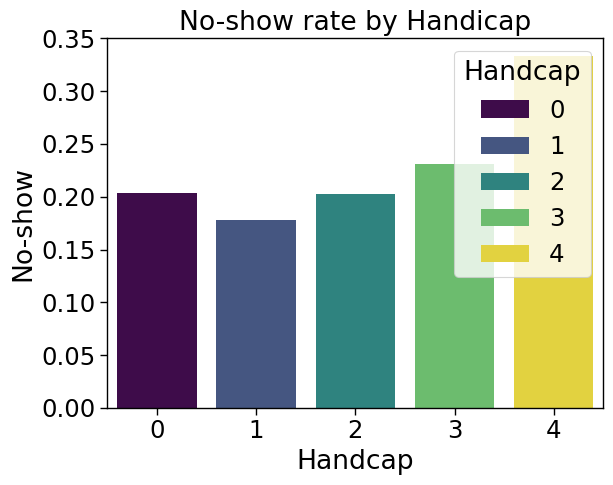

In [12]:
fig, ax = plt.subplots(1)
ax.set_title("No-show rate by Handicap")
sns.barplot(data=df.groupby("Handcap")["No-show"].mean().reset_index(), x="Handcap", y="No-show", hue="Handcap", dodge=False, palette="viridis", ax=ax)

In [13]:
df["Gender"] = df["Gender"].map({"M": 0, "F": 1})

In [14]:
df["LeadTime"] = (pd.to_datetime(df["AppointmentDay"]) - pd.to_datetime(df["ScheduledDay"])).dt.days

In [15]:
np.sum(df["LeadTime"] < 0)

np.int64(37157)

In [16]:
df = df[df['LeadTime'] >= 0].reset_index(drop=True)

C:\Users\GEN1U5\AppData\Local\Temp\ipykernel_14764\1905824304.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(y="No-show", x="lead_bin", data=df_copy.loc[:,["No-show", "lead_bin"]].groupby("lead_bin").mean(), marker="o", ax=ax)


<Axes: xlabel='lead_bin', ylabel='No-show'>

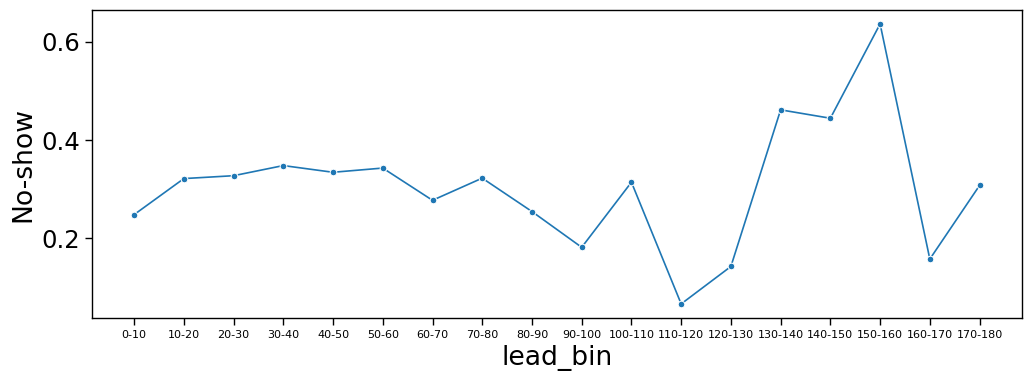

In [17]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.tick_params(axis='x', labelsize=8) 
df_copy = df.copy()
bin_width = 10
max_lead = df_copy['LeadTime'].max()
bins = range(0, int(max_lead) + bin_width, bin_width)
labels = [f"{b}-{b+bin_width}" for b in bins[:-1]]
df_copy['lead_bin'] = pd.cut(df_copy['LeadTime'], bins=bins, labels=labels, right=False)
sns.lineplot(y="No-show", x="lead_bin", data=df_copy.loc[:,["No-show", "lead_bin"]].groupby("lead_bin").mean(), marker="o", ax=ax)

In [18]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

In [19]:
features = ["Gender", "Age", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received", "LeadTime"]
label = "No-show"
X = df.loc[:, features].to_numpy()
y = df[label].to_numpy().reshape(-1, 1)
X_norm = normalize(X)

In [20]:
X_norm = normalize(X)

In [21]:
X_train = X_norm[:10000]
y_train = y[:10000]
X_test = X_norm[10000:11000]
y_test = y[10000:11000].reshape(-1, 1)

# Part 1 

In [22]:
class NeuralNetworkBinary:
    def __init__(self, layers):
        self.num_layers = len(layers) - 1
        self.weights = [np.random.randn(layers[i], layers[i + 1]) * np.sqrt(2 / layers[i]) for i in range(len(layers) - 2)]
        self.weights.append(np.random.randn(layers[-2], layers[-1]) / np.sqrt(layers[-2]))
        # shape = (n_in, n_out)
        self.biases = [np.random.randn(1, layers[i]) for i in range(1, len(layers))]
        # shape = (1, n_out)
        
    def forward_pass(self, x):
        z = []
        a = [x]
        for i in range(self.num_layers):
            z_new = a[i] @ self.weights[i] + self.biases[i] 
            z.append(z_new)
            if i == self.num_layers - 1:
                a_new = self.sigmoid(z_new)
            else:
                a_new = self.relu(z_new)
            a.append(a_new)
        return (z, a)
    def gradient_descent(self, training_data, batch_size, epochs, alpha, threshold=0.5, weighted=False, val_data=None):
        # training_data = (X, y) 
        # X = (m, n)    y = (m, 1)
        X = training_data[0]
        y = training_data[1]
        self.class_weight = self.compute_class_weight(y)

        self.accuracies = np.zeros(epochs)
        self.f1s = np.zeros(epochs)
        self.costs = np.zeros(epochs)

        for e in range(epochs):
            # mini batches creation
            perm = np.random.permutation(X.shape[0])
            X_shuffled = X[perm]
            y_shuffled = y[perm]
            batches = [(X_shuffled[i:i+batch_size], y_shuffled[i:i+batch_size]) for i in range(0, X.shape[0], batch_size)]
            for batch in batches:
                dws, dbs = self.compute_derivatives(batch, weighted)
                self.weights = [self.weights[i] - alpha*dws[i] for i in range(self.num_layers)]
                self.biases = [self.biases[i] - alpha*dbs[i] for i in range(self.num_layers)]
            
            epsilon = 1e-8
            self.costs[e] = self.compute_cost(np.clip(self.forward_pass(X)[1][-1], epsilon, 1 - epsilon), y)
            
            if val_data:
                X_val = val_data[0]
                y_val = val_data[1]
                # self.accuracies[e] = self.compute_accuracy(y_hat, y_test)

                confusion_matrix = self.confusion_matrix(X_val, y_val, threshold=threshold)
                self.f1s[e] = self.compute_f1(confusion_matrix)
        if val_data:
            self.pr_roc_data = self.pr_roc(X_val, y_val)
                
            # print(f"epoch {e} done, Accuracy: {self.accuracies[-1]*100}%")

    def compute_class_weight(self, y):
        return np.sum(y == 0) / np.sum(y == 1)
    
    def compute_derivatives(self, batch, weighted):
        X = batch[0]
        y = batch[1]
        batch_size = X.shape[0]
        
        z, a = self.forward_pass(X)

        # for numerical stability, to avoid division by zero (suggested by GPT)
        f = a[-1]
        epsilon = 1e-8
        f = np.clip(f, epsilon, 1 - epsilon)
        
        dws_batch = [np.zeros_like(w) for w in self.weights]
        dbs_batch = [np.zeros_like(b) for b in self.biases]

        # this is the derivative of class weighted binary cross entropy loss multiplied by the derivative of sigmoid
        # such specific loss function is chosen to help with class imbalance. sources:- The Real-World-Weight Cross-Entropy Loss Function: Modeling the Costs of Mislabeling
        if weighted:
            delta = (1 - y) * f - self.class_weight * y * (1 - f)
        else:
            delta = f - y
        
        for i in range(self.num_layers - 1, -1, -1):
            dws_batch[i] = a[i].T @ delta / batch_size
            dbs_batch[i] = np.mean(delta, axis=0).reshape(1, -1)
            if i > 0:
                delta = (delta @ self.weights[i].T) * self.relu_prime(z[i - 1])

        return dws_batch, dbs_batch

    def relu(self, x):
        return np.maximum(0, x)
        
    def relu_prime(self, x):
        return (x > 0).astype(float)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def compute_cost(self, y_hat, y):
        return -np.mean(self.class_weight * y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def compute_accuracy(self, y_hat, y, threshold=0.5):
        p = (y_hat > threshold).astype(float)
        return np.mean(p == y)

    def predict_class(self, X, threshold=0.5):
        z, a = self.forward_pass(X)
        epsilon = 1e-8
        y_hat = np.clip(a[-1], epsilon, 1 - epsilon)
        return (y_hat > threshold).astype(float)
    
    def confusion_matrix(self, X, y, threshold=0.5):
        p = self.predict_class(X, threshold)
        confusion_matrix = np.zeros(shape=(2, 2))
        confusion_matrix[0, 0] = np.sum(np.logical_and(p == 1, y == 1)) # tp
        confusion_matrix[0, 1] = np.sum(np.logical_and(p == 1, y == 0)) # fp
        confusion_matrix[1, 0] = np.sum(np.logical_and(p == 0, y == 1)) # fn
        confusion_matrix[1, 1] = np.sum(np.logical_and(p == 0, y == 0)) # tn
        return confusion_matrix

    def compute_f1(self, cm):
        tp = cm[0, 0]
        fp = cm[0, 1]
        fn = cm[1, 0]
        tn = cm[1, 1]
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        return f1

    def pr_roc(self, X, y):
        precision = []
        recall = []
        fpr = []
        f1_sweep = []
        # tp  fp
        # fn  tn
        for threshold in np.linspace(0.01, 0.99, 101):
            cm = self.confusion_matrix(X, y, threshold)
            tp = cm[0, 0]
            fp = cm[0, 1]
            fn = cm[1, 0]
            tn = cm[1, 1]
            
            p = tp / (tp + fp) if (tp + fp) > 0 else 0
            r = tp / (tp + fn) if (tp + fn) > 0 else 0
            f = fp / (fp + tn) if (fp + tn) > 0 else 0
            f1 = 2 * p * r / (p + r) if (p + r) > 0 else 0
            precision.append(p)
            recall.append(r)
            fpr.append(f)
            f1_sweep.append(f)
        return (precision, recall, fpr, f1_sweep)
            

In [23]:
import time

In [25]:
nn_np = NeuralNetworkBinary([X_train.shape[1], 64, 16, 8, 1])
tick = time.time()
nn_np.gradient_descent((X_train[:10000], y_train[:10000]), 1500, 5000, 0.0005, threshold=0.3, weighted=True, val_data=(X_test, y_test))
tock = time.time()
np_time = tock - tick

0.5302806499261448


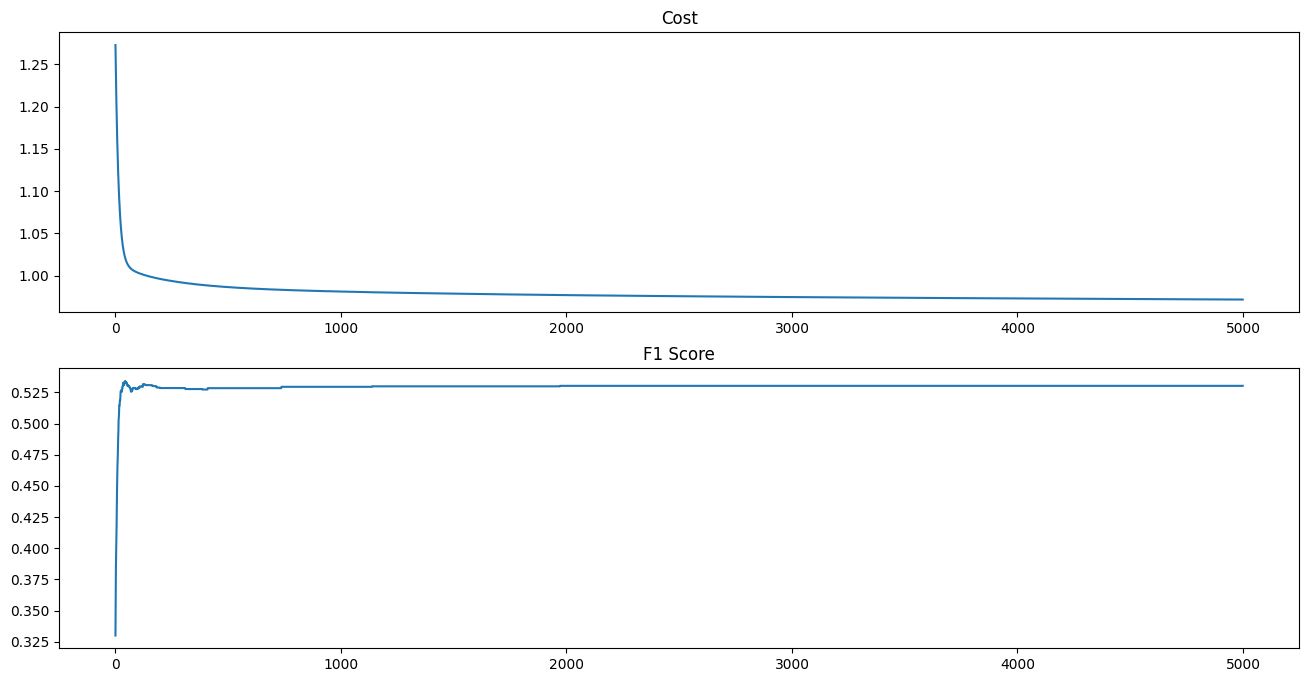

In [26]:
plt.rcdefaults()
fig, ax = plt.subplots(2, figsize=(16, 8))
ax[0].set_title("Cost")
ax[0].plot(nn_np.costs)
ax[1].set_title("F1 Score")
ax[1].plot(nn_np.f1s)
print(nn_np.f1s[-1])

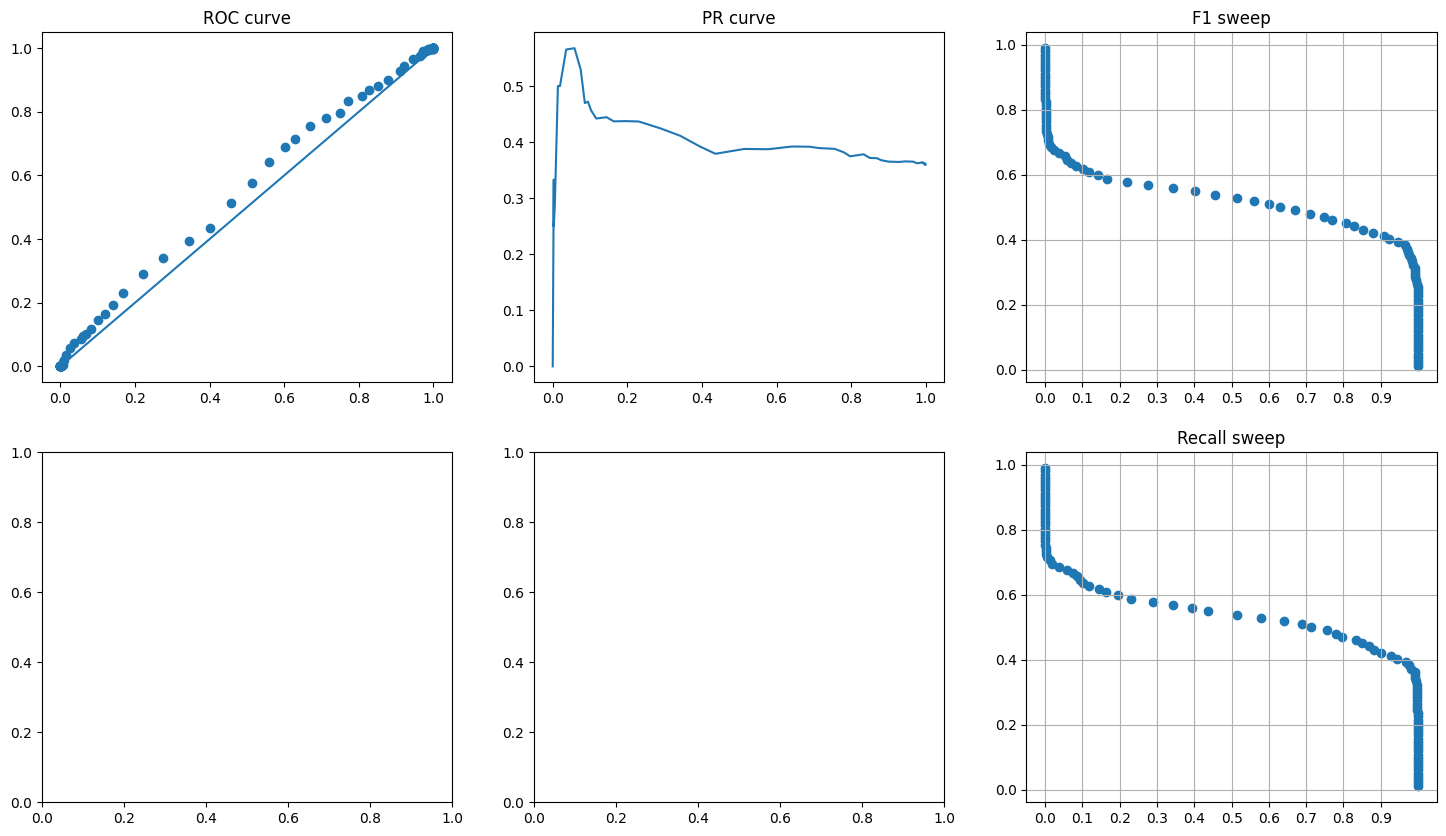

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(18,10))
ax[0, 0].set_title("ROC curve")
ax[0, 0].scatter(nn_np.pr_roc_data[2], nn_np.pr_roc_data[1])
ax[0, 0].plot(np.linspace(0.01, 0.99, 101), np.linspace(0.01, 0.99, 101))
ax[0, 1].set_title("PR curve")
ax[0, 1].plot(nn_np.pr_roc_data[1], nn_np.pr_roc_data[0])
ax[0, 2].set_title("F1 sweep")
ax[0, 2].scatter(nn_np.pr_roc_data[3], np.linspace(0.01, 0.99, 101))
ax[0, 2].grid(True)
ax[0, 2].set_xticks(np.arange(0, 1, 0.1))
ax[1, 2].set_title("Recall sweep")
ax[1, 2].scatter(nn_np.pr_roc_data[1], np.linspace(0.01, 0.99, 101))
ax[1, 2].grid(True)
ax[1, 2].set_xticks(np.arange(0, 1, 0.1))
plt.show()

## cross validation stratified

from sklearn.model_selection import StratifiedKFold

f1_scores = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_index, val_index) in enumerate(skf.split(X_norm, y)):
    X_train, X_val = X_norm[train_index], X_norm[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    model = NeuralNetworkBinary([X_train.shape[1], 64, 16, 8, 1])
    model.gradient_descent((X_train, y_train), 100, 5000, 0.0005, threshold=0.4, weighted=True, val_data=(X_val, y_val)

    f1_scores.append(model.f1s[-1])
    print(f"fold {fold} completed")

np.mean(f1_scores)

# Part 2

In [28]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [86]:
class NeuralNetwork(nn.Module):
    def __init__(self, layers_dim):
        super(NeuralNetwork, self).__init__()
        self.num_layers = len(layers_dim) - 1
        self.layers = nn.ModuleList()
        
        for i in range(len(layers_dim) - 1):
            layer = nn.Linear(layers_dim[i], layers_dim[i + 1])
            if i < self.num_layers - 1:
                nn.init.kaiming_normal_(layer.weight)
            else:
                nn.init.xavier_normal_(layer.weight)
                
            self.layers.append(layer)
        
    def forward(self, x):
        for i in range(self.num_layers):
            x = self.layers[i](x)
            if i < self.num_layers - 1:
                x = nn.functional.relu(x)
                
        return x
    
    def predict_class(self, x, threshold=0.5):
        x = torch.tensor(x, dtype=torch.float32)
        logits = self(x)
        probs = torch.sigmoid(logits)
        preds = (probs > threshold).float()
        return preds

def train_model(model, training_data, batch_size, epochs, alpha, threshold=0.5, weighted=False, val_data=None):
    X = training_data[0]
    y = training_data[1]
    tensor_x = torch.tensor(X, dtype=torch.float32)
    tensor_y = torch.tensor(y, dtype=torch.float32)
    dataset = TensorDataset(tensor_x, tensor_y)
    training_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    model.costs = np.zeros(epochs)
    model.f1s = np.zeros(epochs)

    optimizer = torch.optim.SGD(model.parameters(), lr=alpha)
    
    if weighted:
        weight_tensor = torch.tensor(np.sum(y == 0) / np.sum(y == 1), dtype=torch.float32)
        loss_fn = nn.BCEWithLogitsLoss(pos_weight=weight_tensor)
    else:
        loss_fn = nn.BCEWithLogitsLoss()

    for e in range(epochs):
        model.costs[e] = train(model, optimizer, loss_fn, threshold, training_loader, "cpu")
        logits = model(tensor_x)
        preds = (torch.sigmoid(logits) > threshold).float()
        model.f1s[e] = f1_score(y, preds)
        
def train(model, optimizer, loss_fn, threshold, training_loader, device="cpu"):
    m = len(training_loader)
    model.train()

    epoch_loss = 0
    
    for X_batch, y_batch in training_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        
        logits_batch = model(X_batch)

        loss = loss_fn(logits_batch, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    return epoch_loss / m

def evaluate(model, validation_data, threshold=0.5):
    X_val = validation_data[0]
    tensor_x = torch.Tensor(X_val)
    y_val = validation_data[1]

    y_prob = torch.sigmoid(model(tensor_x)).detach().numpy()
    y_pred = model.predict_class(tensor_x, threshold).numpy()
    return metrics(y_val, y_prob, y_pred)

def metrics(y_val, y_prob, y_pred):
    f1 = f1_score(y_val, y_pred)
    pr = precision_recall_curve(y_val, y_prob)
    roc = roc_curve(y_val, y_prob)
    pr_auc = auc(pr[1], pr[0])
    accuracy = np.sum((np.array(y_val) == np.array(y_pred)).astype(float)) / len(y_pred)
    return f1, pr, roc, pr_auc, accuracy

In [85]:
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, auc

In [44]:
pt_nn = NeuralNetwork([X_train.shape[1], 64, 16, 8, 1])
tick = time.time()
train_model(pt_nn, (X_train, y_train), 1500, 5000, 0.0005, threshold=0.4, weighted=True)
tock = time.time()
# pt_time = tock - tick

np.float64(0.9663040382521493)

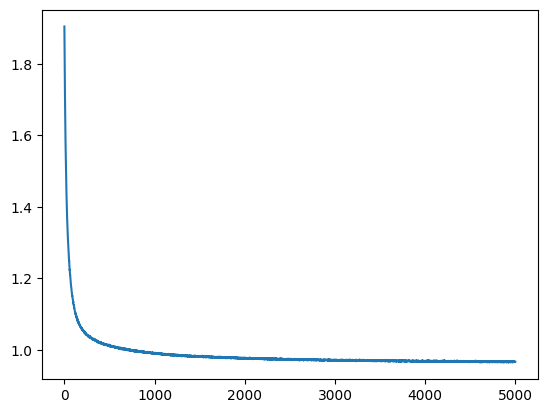

In [46]:
plt.plot(pt_nn.costs)
pt_nn.costs[-1]

In [36]:
f1_score(pt_nn.predict_class(torch.Tensor(X_train[:1000])), y_train[:1000])

C:\Users\GEN1U5\AppData\Local\Temp\ipykernel_14764\1720554997.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


0.4115853658536585

np.float64(0.45144647134696886)

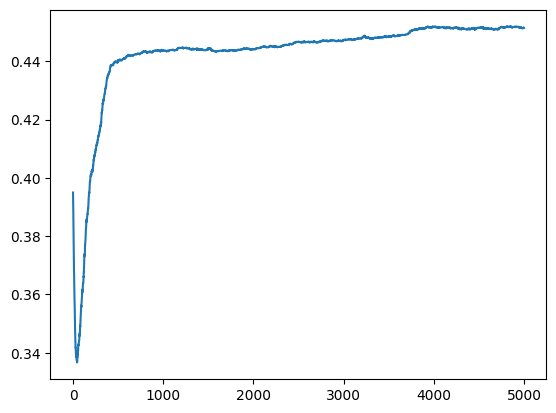

In [47]:
plt.plot(pt_nn.f1s)
pt_nn.f1s[-1]

In [45]:
import copy
copy_pt = copy.deepcopy(pt_nn)

In [87]:
data_pt = evaluate(pt_nn, (X_test, y_test), threshold=0.4)
y_prob = nn_np.forward_pass(X_test)[1][-1]
y_pred = nn_np.predict_class(X_test, threshold=0.4)
data_np = metrics(y_test, y_prob, y_pred)

C:\Users\GEN1U5\AppData\Local\Temp\ipykernel_14764\1720554997.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


In [ ]:
fig, ax = plt.subplots(2, figsize=(16,8))
ax[0].plot(data[1][1], data[1][0])
ax[1].plot(data[2][1], data[2][0])
ax[1].plot([0, 1], [0, 1])

In [39]:
pt_time

621.8677842617035

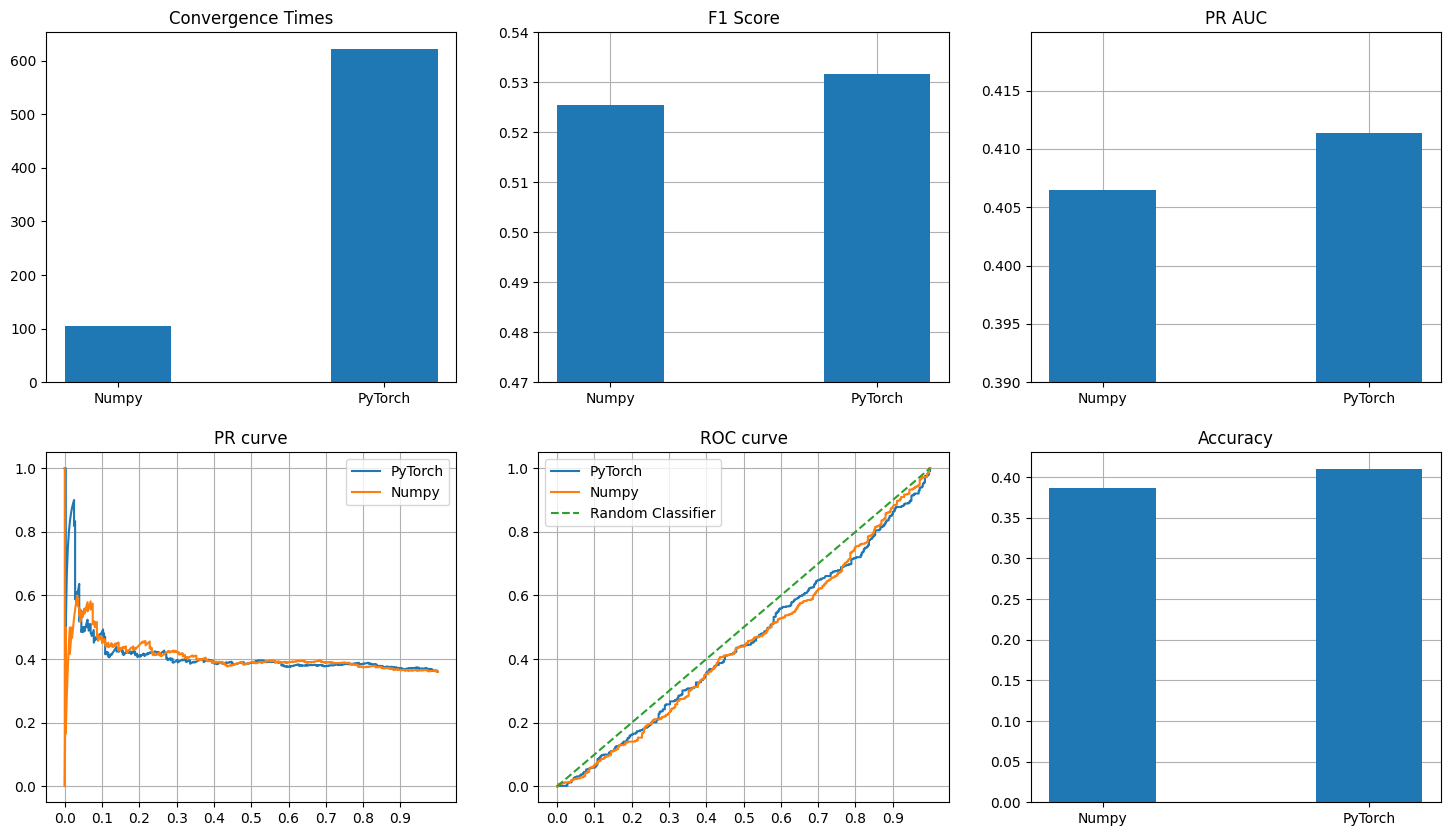

In [89]:
fig, ax = plt.subplots(2, 3, figsize=(18,10))
ax[0, 0].set_title("Convergence Times")
ax[0, 0].bar(["Numpy", "PyTorch"], [np_time, pt_time], width=0.4)

ax[0, 1].set_title("F1 Score")
ax[0, 1].grid(True, zorder=1)
ax[0, 1].bar(["Numpy", "PyTorch"], [data_np[0], data_pt[0]], width=0.4, zorder=2)
ax[0, 1].set_ylim(0.47, 0.54)
ax[0, 1].set_yticks(np.arange(0.47, 0.54, 0.01))

ax[0, 2].set_title("PR AUC")
ax[0, 2].grid(True, zorder=1)
ax[0, 2].bar(["Numpy", "PyTorch"], [data_np[3], data_pt[3]], width=0.4, zorder=2)
ax[0, 2].set_ylim(0.39, 0.42)
ax[0, 2].set_yticks(np.arange(0.39, 0.42, 0.005))

ax[1, 0].set_title("PR curve")
ax[1, 0].plot(data_pt[1][1], data_pt[1][0])
ax[1, 0].plot(data_np[1][1], data_np[1][0])
ax[1, 0].legend(["PyTorch", "Numpy"])
ax[1, 0].grid(True)
ax[1, 0].set_xticks(np.arange(0, 1, 0.1))

ax[1, 1].set_title("ROC curve")
ax[1, 1].plot(data_pt[2][1], data_pt[2][0])
ax[1, 1].plot(data_np[2][1], data_np[2][0])
ax[1, 1].plot([0, 1], [0, 1], '--')
ax[1, 1].legend(["PyTorch", "Numpy", "Random Classifier"])
ax[1, 1].grid(True)
ax[1, 1].set_xticks(np.arange(0, 1, 0.1))

ax[1, 2].set_title("Accuracy")
ax[1, 2].grid(True, zorder=1)
ax[1, 2].bar(["Numpy", "PyTorch"], [data_np[4], data_pt[4]], width=0.4, zorder=2)

plt.show()

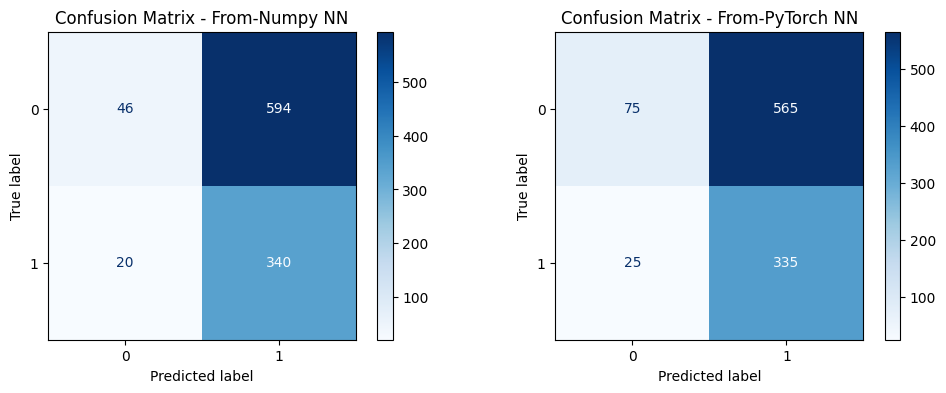

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].set_title("Confusion Matrix - From-Numpy NN")
ConfusionMatrixDisplay.from_predictions(y_test, nn_np.predict_class(X_test, threshold=0.4), cmap='Blues', ax=ax[0])

ax[1].set_title("Confusion Matrix - From-PyTorch NN")
ConfusionMatrixDisplay.from_predictions(y_test, pt_nn.predict_class(X_test, threshold=0.4), cmap='Blues', ax=ax[1])